In [1]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_pickle(r'C:\Users\Aditya\OneDrive - Manipal Academy of Higher Education\Desktop\Tasks\Manas\Datasets\nnfs_dataset\data_batch_3')

X =np.array(df[b'data'])
Y = np.array(df[b'labels'])

In [3]:
X= X/255
m = 10000
X = X.T
# Y= Y.reshape(1, 10000)
print(X.shape)
print(Y.shape)

(1024, 10000)
(10000,)


In [4]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

In [5]:
a = one_hot(Y)
print(a[:3])
print(Y.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(10000,)


In [6]:
def initialize_parameters():
    n_x = 1024
    n_h = 32
    n_y = 10
    W1 = np.random.rand(n_h,n_x) * 0.1
    b1 = np.random.rand(n_h,1)*0.1
    W2 = np.random.rand(n_y,n_h) *0.1
    b2 = np.random.rand(n_y,1)*0.1
    
#     print(W1.shape)
#     print(b1.shape)
#     print(W2.shape)
#     print(b2.shape)
#     print(W1[:2])
#     print(b1[:2])
#     print(W2[:2])
#     print(b2[:2])
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = initialize_parameters()

In [8]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

In [9]:
# a = one_hot(Y)
# print(a[:3])
# print(Y.shape)

In [10]:
def ReLU(Z):
    return np.maximum(Z,0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z),axis=0)
    return A

In [11]:
def forward_prop(X,W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)

    
#     print(Z1.shape)
#     print(A1.shape)
#     print(Z2.shape)
#     print(A2.shape)
#     print(Z1[:2])
#     print(A2[:2])
#     print(Z2[:2])
#     print(len(A2))
#     print(np.sum(A2,axis=0))
    
    return Z1,A1,Z2,A2

In [12]:
Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)

In [13]:
costlist = []

def loss_function(A2, Y, W1, b1, W2, b2):
#     correct_confi=np.array(A2*(one_hot(Y).T))
#     print(correct_confi.shape)
#     cost=np.sum(correct_confi,axis=0)
#     print(cost.min())

#     negetive_log = one_hot(Y).T - correct_confi
#     loss = np.mean(negetive_log)
#     incorrect_confi = one_hot(Y),A2
#     print(incorrect_confi[:2])
    
    A2_clipped = np.clip(A2,1e-7 , 1-1e-7)
    A2 = A2_clipped
    
    logprobs = np.multiply(np.log(A2), one_hot(Y).T)
    loss = - np.sum(logprobs) / m
    costlist.append(loss)
    
    return loss 

In [14]:
loss  = loss_function(A2, Y, W1, b1, W2, b2)

In [15]:
def backward_prop(W1, b1, W2, b2,Z1, A1, Z2, A2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y.T
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2,axis = 1,keepdims=True)
    dZ1 = (W2.T.dot(dZ2))
    dZ1 = dZ1 * ReLU_deriv(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1,axis=1,keepdims=True)
    
    
#     print('DZ2: ',dZ2.shape)
#     print('DW2: ',dW2.shape)
#     print('DB2: ',db2.shape)
#     print('DZ1: ',dZ1.shape)
#     print('DW1: ',dW1.shape)
#     print('DB1: ',db1.shape)
    
    
#     print(dZ2[1])
#     print(dW2[:2])
#     print(db2[:2])
#     print(dZ1[:2])
#     print(dW1[:2])
#     print(db1[:1])
    
    return dW1, db1, dW2, db2
    

In [16]:
dW1, db1, dW2, db2 =backward_prop(W1, b1, W2, b2, Z1, A1, Z2, A2, X, Y)

In [17]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate= 0.015):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
        
#     print(W1[:2])
#     print(b1[:2])
#     print(W2[:2])
#     print(b2[:2])
    
    return W1, b1, W2, b2

In [18]:
W1, b1, W2, b2  = update_parameters(W1, b1, W2, b2 , dW1, db1, dW2, db2)

In [19]:
def get_predictions(A2):
    return np.argmax(A2)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [20]:
def nn_model(X, Y, n_h, num_iterations):
    W1, b1, W2, b2 = initialize_parameters()
    for i in range(0, num_iterations):
        Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
        loss = loss_function(A2, Y, W1, b1, W2, b2)
        dW1, db1, dW2, db2 =backward_prop(W1, b1, W2, b2, Z1, A1, Z2, A2, X, Y)
        W1, b1, W2, b2  = update_parameters(W1, b1, W2, b2 , dW1, db1, dW2, db2)
        if i % 1000 == 0:
            predictions = get_predictions(A2)
            print("Iteration: ", i , '  loss:',loss , "   accuracy: ",(get_accuracy(predictions, Y))*100)
    return W1, b1, W2, b2,loss

In [21]:
W1, b1, W2, b2,loss = nn_model(X, Y, n_h = 32, num_iterations=5000)

Iteration:  0   loss: 8.331015373814985    accuracy:  9.969999999999999
Iteration:  1000   loss: 2.1051654872586556    accuracy:  23.21
Iteration:  2000   loss: 2.042502826822829    accuracy:  27.43
Iteration:  3000   loss: 2.01483662341212    accuracy:  29.37
Iteration:  4000   loss: 1.9934884365862144    accuracy:  30.409999999999997


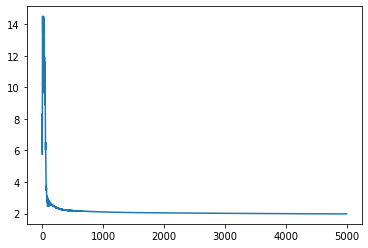

In [22]:
num_iterations = 5000
plt.plot(np.arange(num_iterations+1), costlist)